## Unsupervised learning examples

Partially adapted from https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

Dataset consists of 400 faces


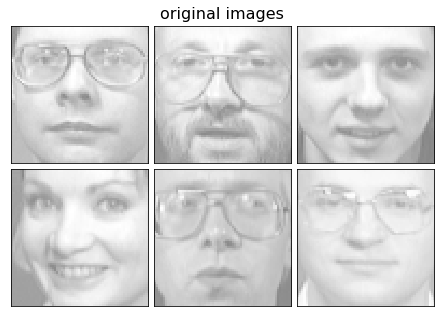

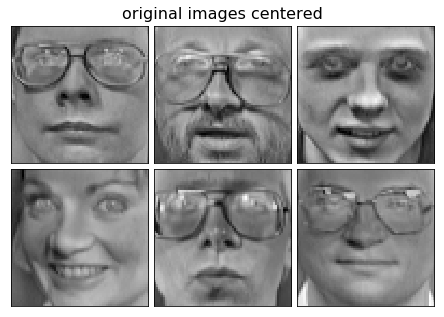

In [87]:
import logging
from time import time
import numpy as np

from numpy.random import RandomState
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 3
n_components = n_row * n_col
rng = RandomState(0)

# #############################################################################
faces= fetch_olivetti_faces(shuffle=True,
                                random_state=rng)

faces = faces.data
n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray, image_shape = (64, 64)):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    
plot_gallery("original images", faces[10:16])

plot_gallery("original images centered", faces_centered[10:16])

In [88]:
from numpy.linalg import svd

U,S,Vt = svd(faces_centered, full_matrices=False)

In [89]:
print("shape of U: {}".format(U.shape))
print("shape of S: {}".format(S.shape))
print("shape of V: {}".format(Vt.shape))


shape of U: (400, 400)
shape of S: (400,)
shape of V: (400, 4096)


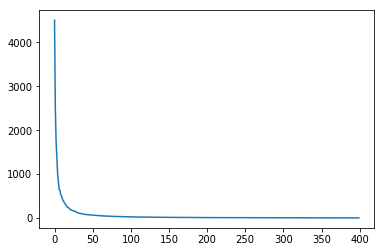

In [90]:
plt.plot(S**2)

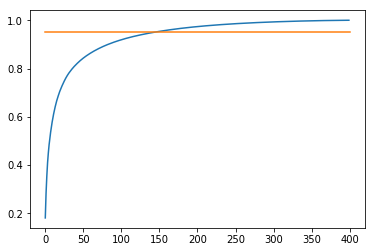

In [91]:
plt.plot(np.cumsum(S**2)/np.sum(S**2))
plt.plot([0,400],[0.95,0.95])

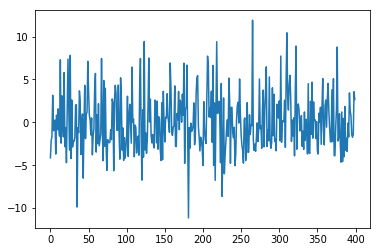

In [92]:
# first PC:
Z = faces_centered.dot(Vt[0:1].T)

plt.plot(Z)



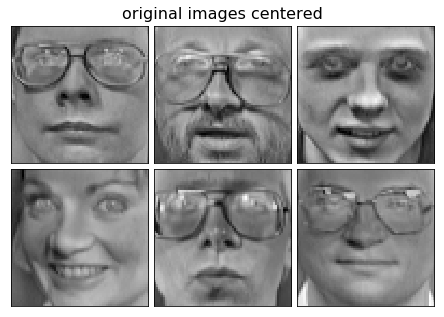

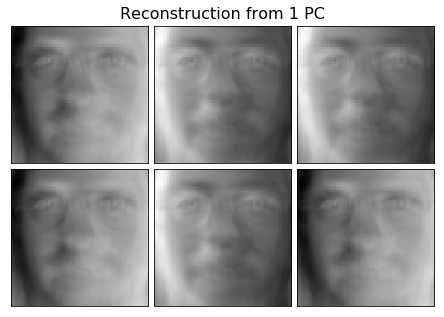

In [93]:
Xbar = Z.dot(Vt[0:1])

plot_gallery("original images centered", faces_centered[10:16])
plot_gallery("Reconstruction from {} PC".format(Z.shape[1]), Xbar[10:16])

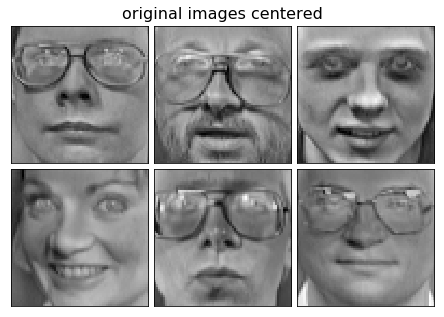

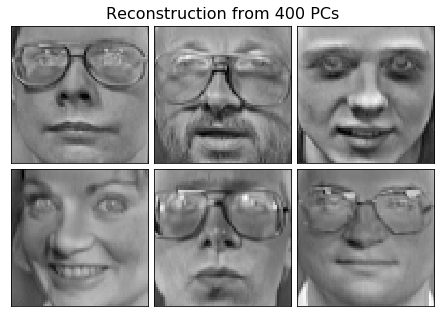

In [94]:
Z = faces_centered.dot(Vt[0:400].T)
Xbar = Z.dot(Vt[0:400])

plot_gallery("original images centered", faces_centered[10:16])
plot_gallery("Reconstruction from {} PCs".format(Z.shape[1]), Xbar[10:16])

## Kernel PCA

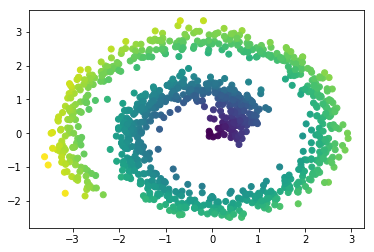

In [73]:
X0 = np.linspace(0, 10, num=1000)
X1 = np.sqrt(X0)*np.cos(X0)+np.random.randn(1000)*0.2
X2 = np.sqrt(X0)*np.sin(X0)+np.random.randn(1000)*0.2
radius = np.array(np.sqrt(X1**2+X2**2))
radius /= np.max(radius)

plt.scatter(X1,X2,c=radius,cmap = 'viridis')

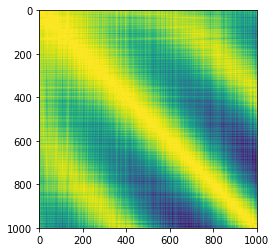

In [76]:
rbf = RBF(length_scale = 5)

X = np.vstack([X1,X2]).T
X = X - np.mean(X,0)

K = rbf(X, X)
plt.imshow(K)

In [77]:
Uk,Sk,Vtk = svd(K, full_matrices=False)

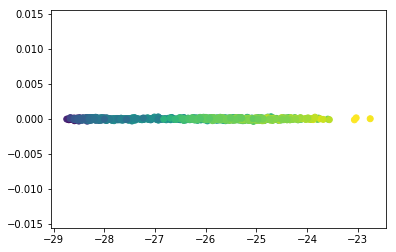

In [78]:
# first PC:
Z = K.dot(Vtk[0:1].T)

plt.scatter(Z,np.random.randn(Z.shape[0])*0.0001,c=radius)


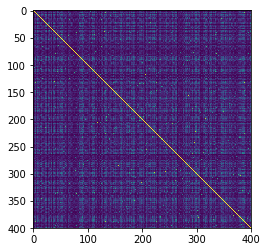

In [81]:
from sklearn.gaussian_process.kernels import RBF

rbf = RBF(length_scale = 5)

K = rbf(faces_centered, faces_centered)
plt.imshow(K)

In [82]:
Uk,Sk,Vtk = svd(K, full_matrices=False)

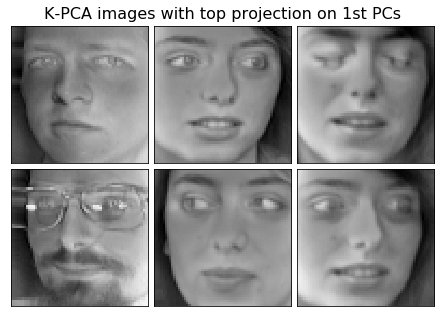

In [83]:
Z = K.dot(Vtk[0:1].T)

plot_gallery("K-PCA images with top projection on 1st PCs", faces_centered[np.argsort(Z.T).squeeze()[-6:]])


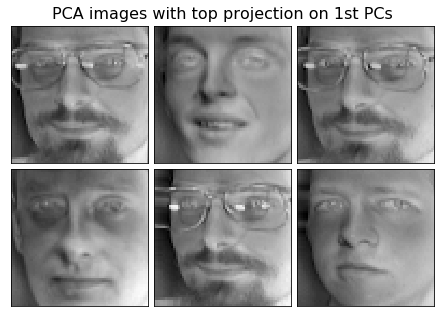

In [84]:
Z = faces_centered.dot(Vt[0:1].T)

plot_gallery("PCA images with top projection on 1st PCs", faces_centered[np.argsort(Z.T).squeeze()[-6:]])


### ICA

In [85]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=15)
S_ = ica.fit_transform(faces_centered.T)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix


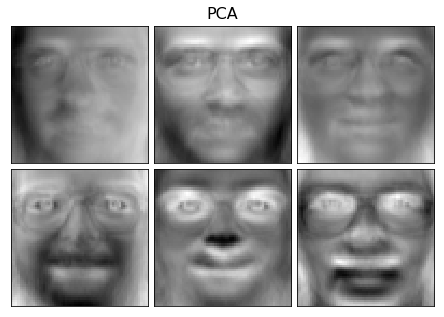

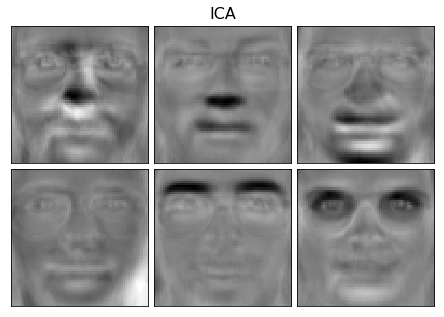

In [86]:
plot_gallery("PCA", Vt[0:6])
plot_gallery("ICA", S_.T[0:6])

### K-means vs. GMM

In [29]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture 



In [48]:
from sklearn import datasets

X,_ = datasets.make_blobs(n_samples=n_samples,cluster_std=2,random_state=8)

# Anisotropicly distributed data
transformation = [[0.6, -0.6], [-0.4, 0.8]]
random_state = 170
X_aniso, y = datasets.make_blobs(n_samples=n_samples,cluster_std=1, random_state=random_state)
X_aniso = np.dot(X_aniso, transformation)
# aniso = (X_aniso, y)

Text(0.5, 1.0, 'K-means clustering')

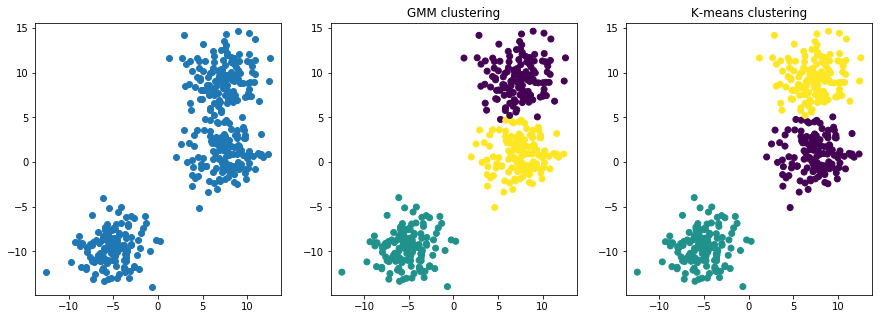

In [49]:

Km = KMeans(n_clusters=3)
gmm = GaussianMixture(n_components=3, covariance_type='full')


plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')

plt.subplot(1, 3, 2)
Cgmm = gmm.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=Cgmm)
plt.axis('equal')
plt.title('GMM clustering')

plt.subplot(1, 3, 3)
CK = Km.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=CK)
plt.axis('equal')
plt.title('K-means clustering')


Text(0.5, 1.0, 'K-means clustering')

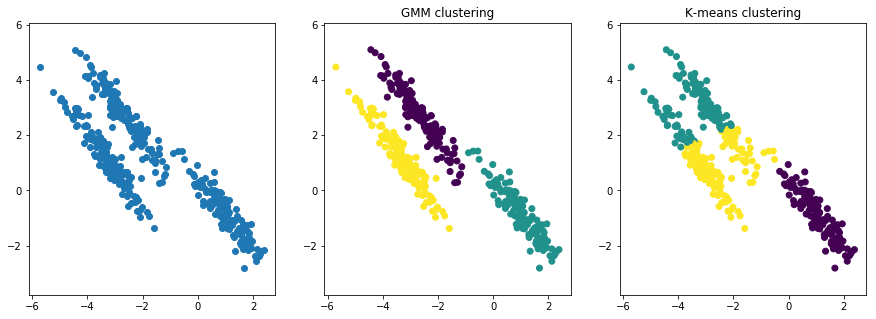

In [50]:
Km = KMeans(n_clusters=3)
gmm = GaussianMixture(n_components=3, covariance_type='full')


plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X_aniso[:,0],X_aniso[:,1])
plt.axis('equal')

plt.subplot(1, 3, 2)
Cgmm2 = gmm.fit_predict(X_aniso)
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=Cgmm2)
plt.axis('equal')
plt.title('GMM clustering')

plt.subplot(1, 3, 3)
CK2 = Km.fit_predict(X_aniso)
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=CK2)
plt.axis('equal')
plt.title('K-means clustering')
